In [1]:
# ! pip install numpy
# ! pip install pandas
# ! pip install xlrd
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install ipywidgets
# ! pip install plotly
# ! pip install cufflinks
# ! pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import cufflinks as cf
%matplotlib inline

In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.DataFrame(np.random.rand(100,2),columns = ('A','B'))
df.shape

(100, 2)

In [5]:
df.head()

,A,B
0,0.602603,0.403523
1,0.407790,0.879516
2,0.572700,0.345323
3,0.304510,0.323268
4,0.013538,0.210961


<AxesSubplot: >

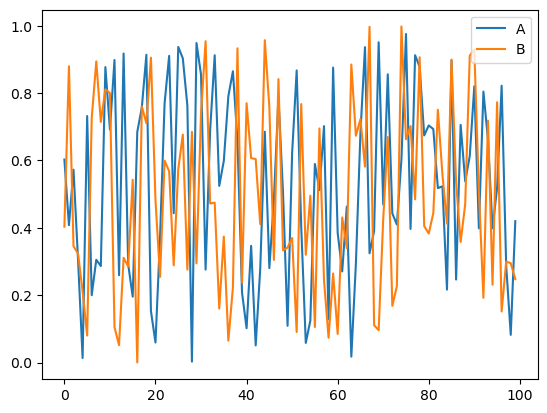

In [6]:
df.plot()

In [7]:
df.iplot()

In [8]:
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=10)

In [9]:
df = pd.read_excel('ufo_since_20th1.xlsx')
df.head(3)

,Unnamed: 0.1,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,0,0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1,1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
2,2,2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66331 entries, 0 to 66330
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0.1          66331 non-null  int64         
 1   Unnamed: 0            66331 non-null  int64         
 2   datetime              66331 non-null  datetime64[ns]
 3   city                  66331 non-null  object        
 4   state                 66331 non-null  object        
 5   country               66331 non-null  object        
 6   shape                 66331 non-null  object        
 7   duration (seconds)    66331 non-null  float64       
 8   duration (hours/min)  66331 non-null  object        
 9   comments              66331 non-null  object        
 10  date posted           66331 non-null  datetime64[ns]
 11  latitude              66331 non-null  float64       
 12  longitude             66331 non-null  float64       
dtypes: datetime64[ns

In [11]:
def grep_year(x):
    x = str(x)
    x = x.split(" ")[0]
    x = x.split("-")[0]
    return x

df["Sight-Year"] = df['datetime'].apply(grep_year)

In [12]:
def grep_month(x):
    x = str(x)
    x = x.split(" ")[0]
    x = x.split("-")[1]
    return x

df["Sight-Month"] = df['datetime'].apply(grep_month)

In [13]:
df.sample(3)

,Unnamed: 0.1,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Sight-Year,Sight-Month
21550,21603,21603,2007-02-01 23:30:00,charlotte,nc,us,oval,3.0,3 seconds,a very high&#44 fast&#44 orange UFO over Charl...,2007-04-27,35.226944,-80.843333,2007,02
45701,45840,45840,2009-07-01 21:00:00,new albany,in,us,unknown,600.0,10 minutes,A night out driving turned moment of awe thank...,2011-03-10,38.285556,-85.824167,2009,07
48805,48949,48949,2011-07-23 06:50:00,mesa,az,us,circle,15.0,10-15 seconds,Big Round Circle UFO Sighting&#44 A.M.,2011-08-07,33.422222,-111.821944,2011,07


In [14]:
df['state'].value_counts().iplot(kind="bar")

In [22]:
df[df.country == 'gb']['state'].value_counts().iplot(kind="bar")

In [16]:
df["Sight-Year"].value_counts().iplot(kind="bar")

In [23]:
df[df.country == 'us']["Sight-Year"].value_counts().iplot(kind="bar")

In [18]:
df["Sight-Month"].value_counts().iplot(kind="bar")

In [19]:
states_us = df[df.country == "us"]["state"].value_counts().index
states_ratio = df[df.country == "us"]["state"].value_counts().values
states_us = [i.upper() for i in states_us]
states_us

['CA',
 'FL',
 'WA',
 'TX',
 'NY',
 'IL',
 'AZ',
 'PA',
 'OH',
 'MI',
 'NC',
 'OR',
 'MO',
 'CO',
 'IN',
 'VA',
 'GA',
 'NJ',
 'MA',
 'WI',
 'TN',
 'MN',
 'SC',
 'CT',
 'KY',
 'MD',
 'NV',
 'OK',
 'NM',
 'IA',
 'AL',
 'UT',
 'KS',
 'AR',
 'ME',
 'LA',
 'ID',
 'NH',
 'MT',
 'WV',
 'NE',
 'MS',
 'AK',
 'HI',
 'VT',
 'RI',
 'SD',
 'WY',
 'DE',
 'ND',
 'PR',
 'DC']

In [20]:
fig = px.choropleth(locations=states_us, locationmode = "USA-states", scope="usa")
fig = go.Figure(data=go.Choropleth(
    locations = states_us,
    z = states_ratio,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Sight Rated by States",
    ))
fig.show()


In [21]:
fig.update_layout(
    title_text = 'Sight rates by states in USA',
    geo_scope = 'usa',
)
